In [28]:
library(ROSE)
library(ggplot2)
library(randomForest)
library(caret)
library(dplyr)
library(e1071)
library(Boruta)
mat.students=read.csv("student-mat.csv")

In [29]:
mat.students$subject <- "m"
# portuguesse students
por.students=read.csv("student-por.csv")
por.students$subject <- "p"

In [30]:
# combine both datasets
students <- rbind(mat.students,por.students)
nrow_i <- nrow(students)

In [31]:
# standarizing column names
colnames(students) <- tolower(colnames(students))

In [32]:
# columns which define duplicated students
uniq.key.cols <- c("school","sex","age","address","famsize","pstatus","medu",
                   "fedu","mjob","fjob","reason","nursery","internet")

In [33]:
# get duplicated rows of the combined dataset
duplicated.rows <- duplicated(students[,uniq.key.cols])

In [34]:
# subset of duplicated students
students.duplicated <- students[duplicated.rows,]
add.duplicates.subject <- function(duplicated){
  # the search for duplicated data in "students" data frame
  rows <- students$school == duplicated$school &
    students$sex == duplicated$sex &
    students$age == duplicated$age &
    students$address == duplicated$address &
    students$famsize == duplicated$famsize &
    students$pstatus == duplicated$pstatus &
    students$medu == duplicated$medu &
    students$fedu == duplicated$fedu &
    students$mjob == duplicated$mjob &
    students$reason == duplicated$reason &
    students$nursery == duplicated$nursery &
    students$internet == duplicated$internet
  # change subject to both math and portuguesse
  students[rows,"subject"] <<- "m.p"
}

In [35]:
# apply the above algorithm to every duplicated row
for(n in 1:nrow(students.duplicated)){
  add.duplicates.subject(students.duplicated[n,])
}

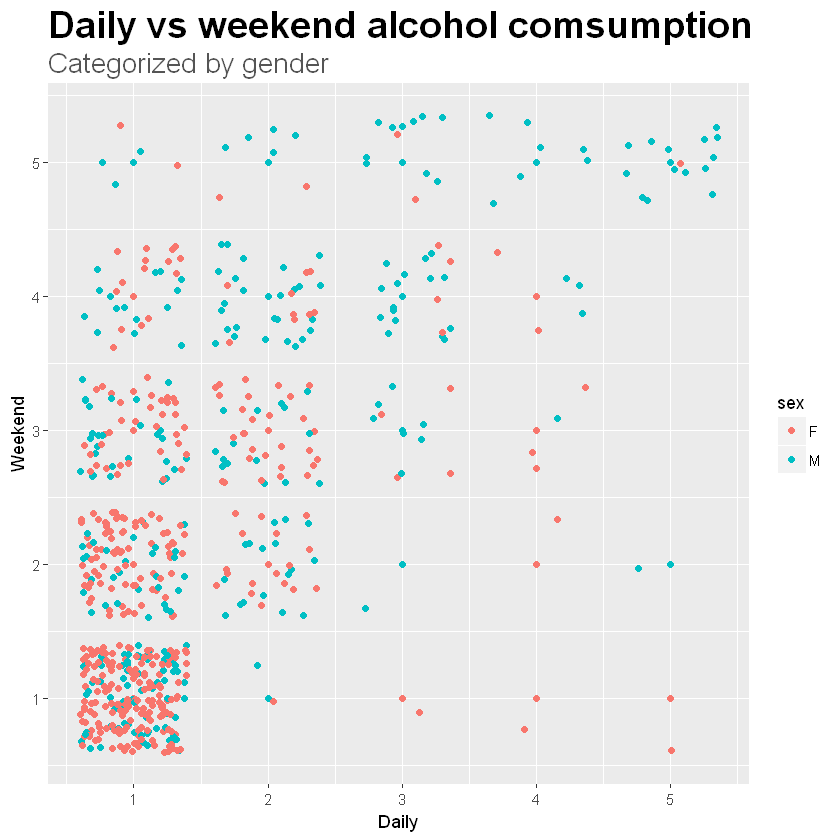


	Welch Two Sample t-test

data:  students[students$school == "MS", "dalc"] and students[students$school == "GP", "dalc"]
t = 1.6241, df = 422.34, p-value = 0.1051
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.02668415  0.28046376
sample estimates:
mean of x mean of y 
 1.587719  1.460829 



	Welch Two Sample t-test

data:  students[students$school == "MS", "walc"] and students[students$school == "GP", "walc"]
t = 0.73926, df = 469.15, p-value = 0.4601
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1286246  0.2837705
sample estimates:
mean of x mean of y 
 2.333333  2.255760 



	Welch Two Sample t-test

data:  students[students$sex == "M", "dalc"] and students[students$sex == "F", "dalc"]
t = 7.1398, df = 395.06, p-value = 4.518e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3969006 0.6985368
sample estimates:
mean of x mean of y 
 1.827206  1.279487 



	Welch Two Sample t-test

data:  students[students$sex == "M", "walc"] and students[students$sex == "F", "walc"]
t = 8.509, df = 472.83, p-value = 2.335e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.6631188 1.0613533
sample estimates:
mean of x mean of y 
 2.790441  1.928205 


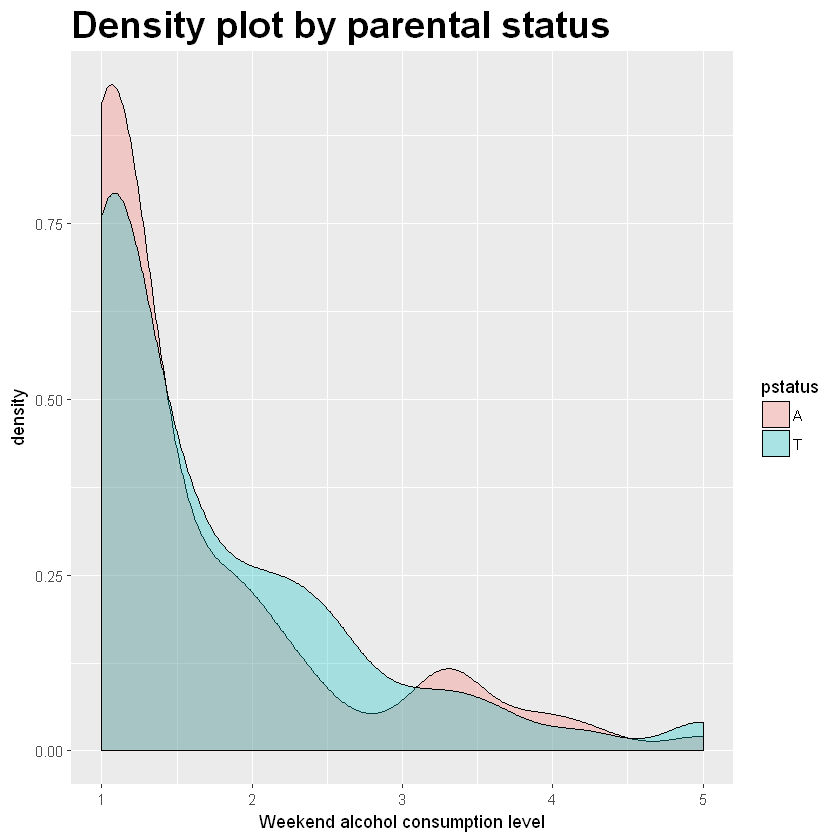

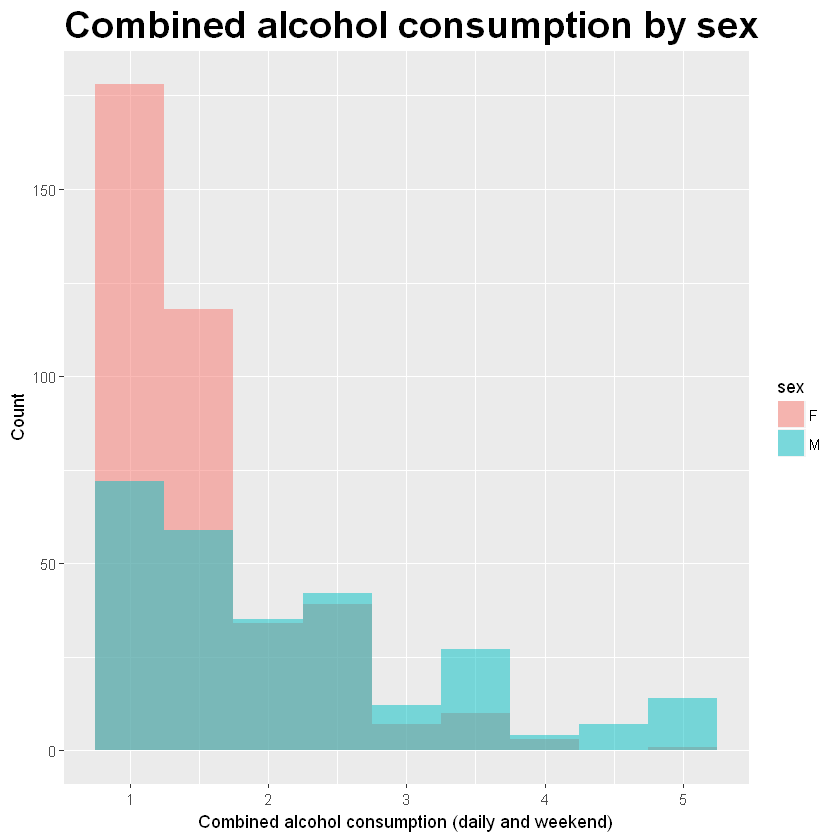


	Welch Two Sample t-test

data:  pappart.acl and ptogether.acl
t = -1.1959, df = 108.47, p-value = 0.2343
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.34133366  0.08443635
sample estimates:
mean of x mean of y 
 1.614458  1.742906 


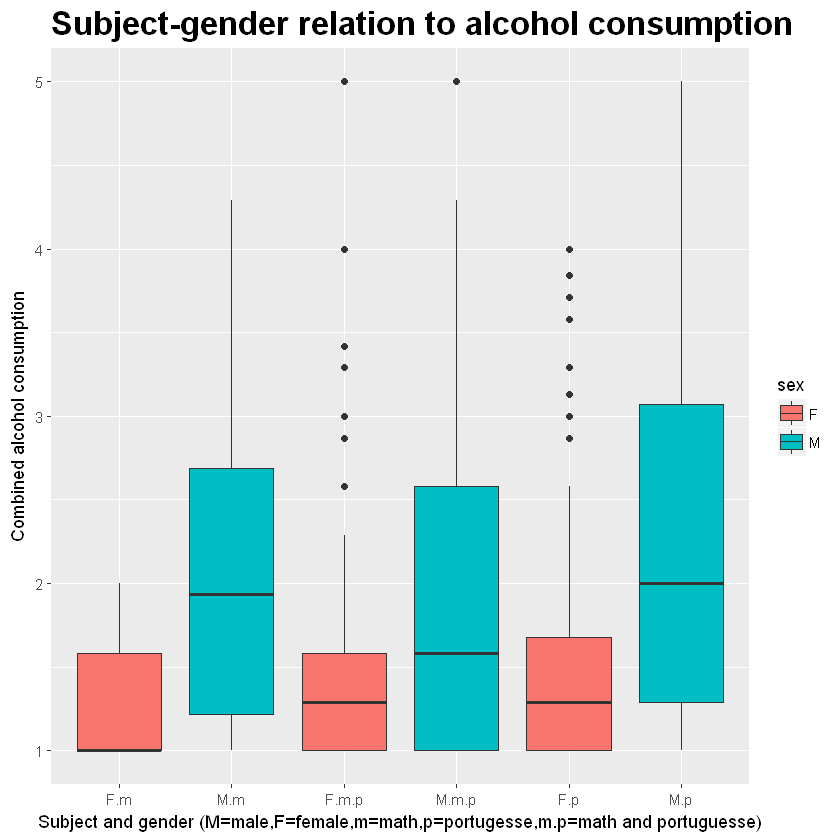

In [36]:
# new remove duplicated
students <- students[!duplicated.rows,]
## Statistical data analysis
### Do students drink more on weekends?
tt <- t.test(students$walc,students$dalc,paired = TRUE,alternative = "greater")
### Visualization 
gg <- ggplot(data=students,aes(x=dalc,y=walc,color=sex))
gg <- gg + geom_point()
gg <- gg + geom_jitter()
gg <- gg + labs(x="Daily",y="Weekend")
gg <- gg + ggtitle("Daily vs weekend alcohol comsumption",
                   subtitle = "Categorized by gender")
gg <- gg + theme(plot.title = element_text(size=22, face="bold"))
gg <- gg + theme(plot.subtitle = element_text(size=17,color = "#555555"))
gg

### Does parent's cohabitation status have an effect on alcohol comsumption? 

# subset of students with parents living together
ptogether <- students[students$pstatus == "T",]
# combined alcohol consumption
ptogether.acl <- (2/7)*ptogether$walc + (5/7)*ptogether$dalc
# subset of students with parents living appart
pappart <- students[students$pstatus == "A",]
# combined alcohol consumption
pappart.acl <- (2/7)*pappart$walc + (5/7)*pappart$dalc

ggplot(students,aes(x=(2/7)*walc+(5/7)*dalc, fill=pstatus)) + 
  geom_density(alpha=.3) +
  ggtitle(label = "Density plot by parental status") +
  labs(x="Weekend alcohol consumption level") +
  theme(plot.title = element_text(size=22, face="bold"))

### Are students from both schools different?

# daily
t.test(students[students$school=="MS","dalc"],
       students[students$school=="GP","dalc"],
       paired = FALSE)
# weekends
t.test(students[students$school=="MS","walc"],
       students[students$school=="GP","walc"],
       paired = FALSE)
### Is there are difference between males and females
# daily
t.test(students[students$sex=="M","dalc"],
       students[students$sex=="F","dalc"],
       paired = FALSE)
# weekends
t.test(students[students$sex=="M","walc"],
       students[students$sex=="F","walc"],
       paired = FALSE)

ggplot(students,aes(x=(2/7)*walc+(5/7)*dalc, fill=sex)) + 
  geom_histogram(binwidth=.5,position="identity",alpha=0.5) +
  ggtitle("Combined alcohol consumption by sex") +
  labs(x="Combined alcohol consumption (daily and weekend)",y="Count") +
  theme(plot.title = element_text(size=22, face="bold"))

## Is student's subject and gender related to alcohol consumption habits?
ggplot(data = students, aes(x=interaction(sex,subject),y=0.29*walc+0.71*dalc)) +
  geom_boxplot(aes(fill=sex)) +
  ggtitle("Subject-gender relation to alcohol consumption") +
  theme(plot.title = element_text(size=20, face="bold")) +
  xlab("Subject and gender (M=male,F=female,m=math,p=portugesse,m.p=math and portuguesse)") +
  ylab("Combined alcohol consumption")


# two sample unpaired t-test
tt <- t.test(pappart.acl,ptogether.acl,paired = FALSE)
tt

In [46]:
# subject as factor
students$subject <- as.factor(students$subject)
students$Alc <- (students$walc *2 + students$dalc * 5) / 7
students$Alc
drinkr <- function(x){
  if (x >= 3 ){
    return(x = 1)
  } else{
    return(x = 0)
  }
}
students$Alc <- sapply(students$Alc, drinkr)
students$Alc <- as.factor(students$Alc)
nrow_f <-nrow(students)
# number of duplicates removed
nduplicates <- nrow_i - nrow_f

[1] 1.000000 1.000000 2.285714 1.000000 1.285714 1.285714 1.000000 1.000000
  [9] 1.000000 1.000000 1.285714 1.000000 1.571429 1.285714 1.000000 1.285714
 [17] 1.285714 1.000000 2.571429 1.571429 1.000000 1.000000 1.571429 2.571429
 [25] 1.000000 1.571429 1.285714 2.571429 1.000000 5.000000 3.285714 1.000000
 [33] 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000 1.000000
 [41] 1.285714 2.571429 1.000000 1.000000 2.000000 1.000000 1.857143 1.000000
 [49] 2.000000 1.000000 2.285714 1.000000 3.285714 2.285714 4.000000 1.000000
 [57] 1.000000 1.000000 1.000000 1.000000 2.285714 5.000000 1.000000 2.571429
 [65] 2.571429 1.285714 5.000000 1.285714 1.571429 2.285714 1.000000 1.000000
 [73] 2.571429 2.000000 2.571429 2.285714 1.000000 1.571429 1.000000 1.285714
 [81] 1.571429 1.285714 1.000000 1.571429 2.285714 2.285714 1.285714 1.571429
 [89] 1.000000 3.571429 1.571429 1.571429 2.285714 1.000000 1.000000 1.000000
 [97] 1.000000 1.000000 1.285714 1.000000 5.000000 1.000000 1.000000 1.000000
[105] 1.000000 1.000000 1.000000 1.000000 3.571429 1.000000 1.000000 1.000000
[113] 1.000000 1.000000 1.000000 1.285714 1.000000 1.000000 1.857143 1.285714
[121] 1.285714 1.285714 1.285714 1.857143 1.000000 2.714286 1.000000 1.000000
[129] 1.285714 2.857143 2.000000 1.285714 1.571429 1.857143 1.000000 1.000000
[137] 2.571429 1.000000 1.571429 1.000000 1.000000 2.000000 1.000000 3.000000
[145] 1.285714 1.000000 1.000000 2.857143 2.857143 3.571429 2.285714 1.000000
[153] 1.000000 1.000000 3.000000 2.142857 1.285714 4.000000 2.000000 1.857143
[161] 2.571429 1.857143 2.142857 1.000000 2.571429 1.000000 1.000000 1.000000
[169] 2.571429 1.000000 1.571429 1.000000 1.000000 4.000000 1.857143 1.857143
[177] 3.285714 1.000000 2.285714 2.285714 2.285714 1.285714 2.285714 1.285714
[185] 1.285714 1.571429 2.142857 1.000000 1.000000 4.285714 3.285714 1.000000
[193] 1.000000 1.285714 3.571429 2.285714 1.285714 2.142857 1.571429 1.571429
[201] 1.285714 1.000000 3.285714 2.000000 1.000000 1.857143 1.000000 1.285714
[209] 4.285714 1.000000 2.571429 1.285714 1.571429 2.571429 2.571429 1.857143
[217] 1.000000 1.285714 1.000000 1.000000 5.000000 1.000000 1.000000 1.571429
[225] 1.571429 4.285714 1.285714 1.285714 1.000000 1.571429 2.571429 1.000000
[233] 1.571429 5.000000 1.000000 1.000000 3.571429 1.857143 2.285714 1.000000
[241] 1.285714 1.000000 1.000000 1.000000 5.000000 1.571429 2.571429 2.571429
[249] 1.571429 2.857143 1.571429 2.571429 1.285714 1.000000 1.000000 1.285714
[257] 1.000000 1.571429 1.000000 1.000000 1.000000 1.000000 3.285714 3.285714
[265] 2.000000 1.571429 1.285714 3.000000 1.571429 1.000000 2.000000 1.000000
[273] 2.285714 1.000000 1.857143 1.000000 1.285714 2.571429 3.285714 1.000000
[281] 1.000000 1.285714 1.285714 1.285714 1.000000 1.571429 1.000000 1.857143
[289] 1.285714 1.000000 1.000000 1.000000 1.571429 2.285714 1.285714 1.000000
[297] 2.000000 1.000000 2.000000 1.000000 1.285714 1.000000 1.000000 1.000000
[305] 1.000000 1.285714 1.571429 2.000000 1.000000 2.000000 1.285714 1.000000
[313] 1.000000 1.285714 1.000000 2.857143 3.000000 1.285714 1.000000 2.000000
[321] 2.285714 2.285714 2.000000 3.571429 5.000000 1.571429 1.285714 2.571429
[329] 1.000000 1.000000 1.000000 1.000000 1.571429 1.285714 2.285714 1.000000
[337] 2.285714 1.571429 1.571429 1.285714 1.285714 2.285714 1.285714 2.285714
[345] 1.571429 5.000000 3.000000 2.285714 2.285714 3.000000 1.571429 1.000000
[353] 1.285714 1.285714 1.285714 1.000000 1.857143 2.285714 1.571429 1.000000
[361] 1.285714 2.571429 2.000000 1.285714 1.285714 3.428571 1.000000 2.285714
[369] 1.000000 1.571429 1.000000 1.285714 1.000000 3.285714 1.285714 2.285714
[377] 1.857143 1.571429 1.000000 1.571429 3.714286 1.571429 2.000000 1.285714
[385] 1.000000 1.000000 4.285714 3.285714 3.000000 3.285714 3.000000 2.000000
[393] 1.571429 1.285714 1.000000 1.000000 1.000000 4.285714 3.857143 1.285714
[401] 1.000000 2.285714 1.000000 2.571429 3.571429 1.857143 2.571429 1.857143
[409] 1.000000 1.285714 

In [47]:
# dimension of the dataset
dim(students)
## [1] 662  34
# remove highly correlated columns
# correlation matrix of numeric predictors
numericColumns <- sapply(students, is.numeric)
corMatrix<-cor(students[,numericColumns])
# find highly correlated columns to later remove
highCor <- findCorrelation(corMatrix,cutoff = .90)
(highCorColumns <- dimnames(corMatrix)[[1]][highCor])
students <- students %>%dplyr:: select(-which(names(.) %in% highCorColumns))
set.seed(2017)

[1] 662  34

character(0)

In [48]:
# 75% train - 25% test
train <- sample(1:nrow(students),size = ceiling(0.8*nrow(students)),replace = FALSE)
students.train <- students[train,]
students.test <- students[-train,]

In [49]:
# we will treat walc and dalc as categorical variables
mtry <- sqrt(ncol(students.train))
ntree <- 1000
student.train <- subset(students.train, select = -c(walc, dalc))
prop.table(table(student.train$Alc))
data.rose <- ROSE(Alc ~ ., data = student.train, seed = 1)$data
prop.table(table(data.rose$Alc))


        0         1 
0.8943396 0.1056604 


        0         1 
0.5264151 0.4735849 

In [ ]:
#### Feature Slection using Caret package not so good.
set.seed(123)
control <- rfeControl(functions=rfFuncs, method="cv", number=10)
rfe.train <- rfe(student.train[,2:31], student.train[,32], sizes=1:12, rfeControl=control)
predictors(rfe.train)

In [ ]:
########   Feature Selection using Bortua Package
set.seed(123)
boruta.train <- Boruta(Alc~., data = student.train, doTrace = 2)
print(boruta.train)
getSelectedAttributes(boruta.train, withTentative = T)

In [ ]:
###########Random Forest
rf <- randomForest(Alc~.,data = data.rose,mtry=mtry,ntree=ntree)
student.test <- subset(students.test, select = -c(walc,dalc,Alc))
yhat.rf <- predict(rf,student.test)
cmRF <- confusionMatrix(yhat.rf,students.test$Alc)
print(cmRF)

In [ ]:
########### SVM
svm_mdl <- svm(Alc~.,data = data.rose)
yhat.svm <- predict(rf,student.test)
cm <- confusionMatrix(yhat.svm,students.test$Alc)
print(cm)
table(yhat.rf,yhat.svm)

In [ ]:
######## Logistic regression
log_mdl <- glm(Alc~ ., family = binomial(link = "logit"), data = data.rose)
yhat <- predict(log_mdl,student.test, type = "response")
yhat_log <- ifelse(yhat > 0.5, 1 , 0)
table(yhat.rf,yhat_log)
cmlog <- confusionMatrix(yhat_log,students.test$Alc)
print(cmlog)